***Anurag Sharma (24AI91R01)***

## **LAB Assignment 9**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Task - 1

In [26]:
# Load the dataset from the URL
df = pd.read_csv("https://archive.ics.uci.edu/static/public/149/data.csv")

print("Data shape:", df.shape)

Data shape: (846, 19)


In [27]:
df.head()

,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PR.AXIS ASPECT RATIO,MAX.LENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PR.AXIS RECTANGULARITY,MAX.LENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO,class
0,95.0,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91.0,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104.0,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93.0,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85.0,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [28]:
# check for null values
df.isnull().sum()

,0
COMPACTNESS,1
CIRCULARITY,0
DISTANCE CIRCULARITY,0
RADIUS RATIO,0
PR.AXIS ASPECT RATIO,0
MAX.LENGTH ASPECT RATIO,0
SCATTER RATIO,0
ELONGATEDNESS,0
PR.AXIS RECTANGULARITY,0
MAX.LENGTH RECTANGULARITY,0


In [29]:
# replace null value of a column with mean value
df.fillna({'COMPACTNESS': df['COMPACTNESS'].mean()}, inplace=True)

# Task - 2



In [30]:
# Count and remove duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# Separate features (X) and target label (y)
X = df.drop('class', axis=1)
y = df['class']

# Display shapes of features and target variable
print("Features shape:", X.shape)
print("Target shape:", y.shape)

Number of duplicate rows: 0
Features shape: (846, 18)
Target shape: (846,)


In [31]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Task - 3

In [11]:
# Task 3: Implementing Hierarchical Agglomerative Clustering (HAC) from scratch

# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Function to calculate average linkage distance between two clusters
def average_linkage(cluster_a, cluster_b, data):
    distances = [euclidean_distance(data[i], data[j]) for i in cluster_a for j in cluster_b]
    return np.mean(distances)

# Hierarchical Agglomerative Clustering implementation
def hierarchical_clustering(data, num_clusters):
    num_samples = data.shape[0]
    clusters = [[i] for i in range(num_samples)]  # Start with each sample as its own cluster

    # Repeat until the desired number of clusters is achieved
    while len(clusters) > num_clusters:
        min_distance = float('inf')
        cluster_a, cluster_b = -1, -1

        # Find the closest pair of clusters
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                distance = average_linkage(clusters[i], clusters[j], data)
                if distance < min_distance:
                    min_distance = distance
                    cluster_a, cluster_b = i, j

        # Merge the closest clusters
        clusters[cluster_a].extend(clusters[cluster_b])
        clusters.pop(cluster_b)

    # Assign cluster labels to each data point
    labels = np.zeros(num_samples, dtype=int)
    for cluster_idx, cluster in enumerate(clusters):
        for sample_idx in cluster:
            labels[sample_idx] = cluster_idx

    return labels

In [12]:
# Perform HAC from scratch with 4 clusters
custom_hac_labels = hierarchical_clustering(X_train.values, num_clusters=4)

# Task -  4

In [32]:
# Task 4: Using Scikit-Learn's AgglomerativeClustering for comparison

# Cluster with Scikit-Learn's AgglomerativeClustering
sklearn_hac = AgglomerativeClustering(n_clusters=4, linkage='average', metric='euclidean')
sklearn_labels = sklearn_hac.fit_predict(X_train)

# Task - 5

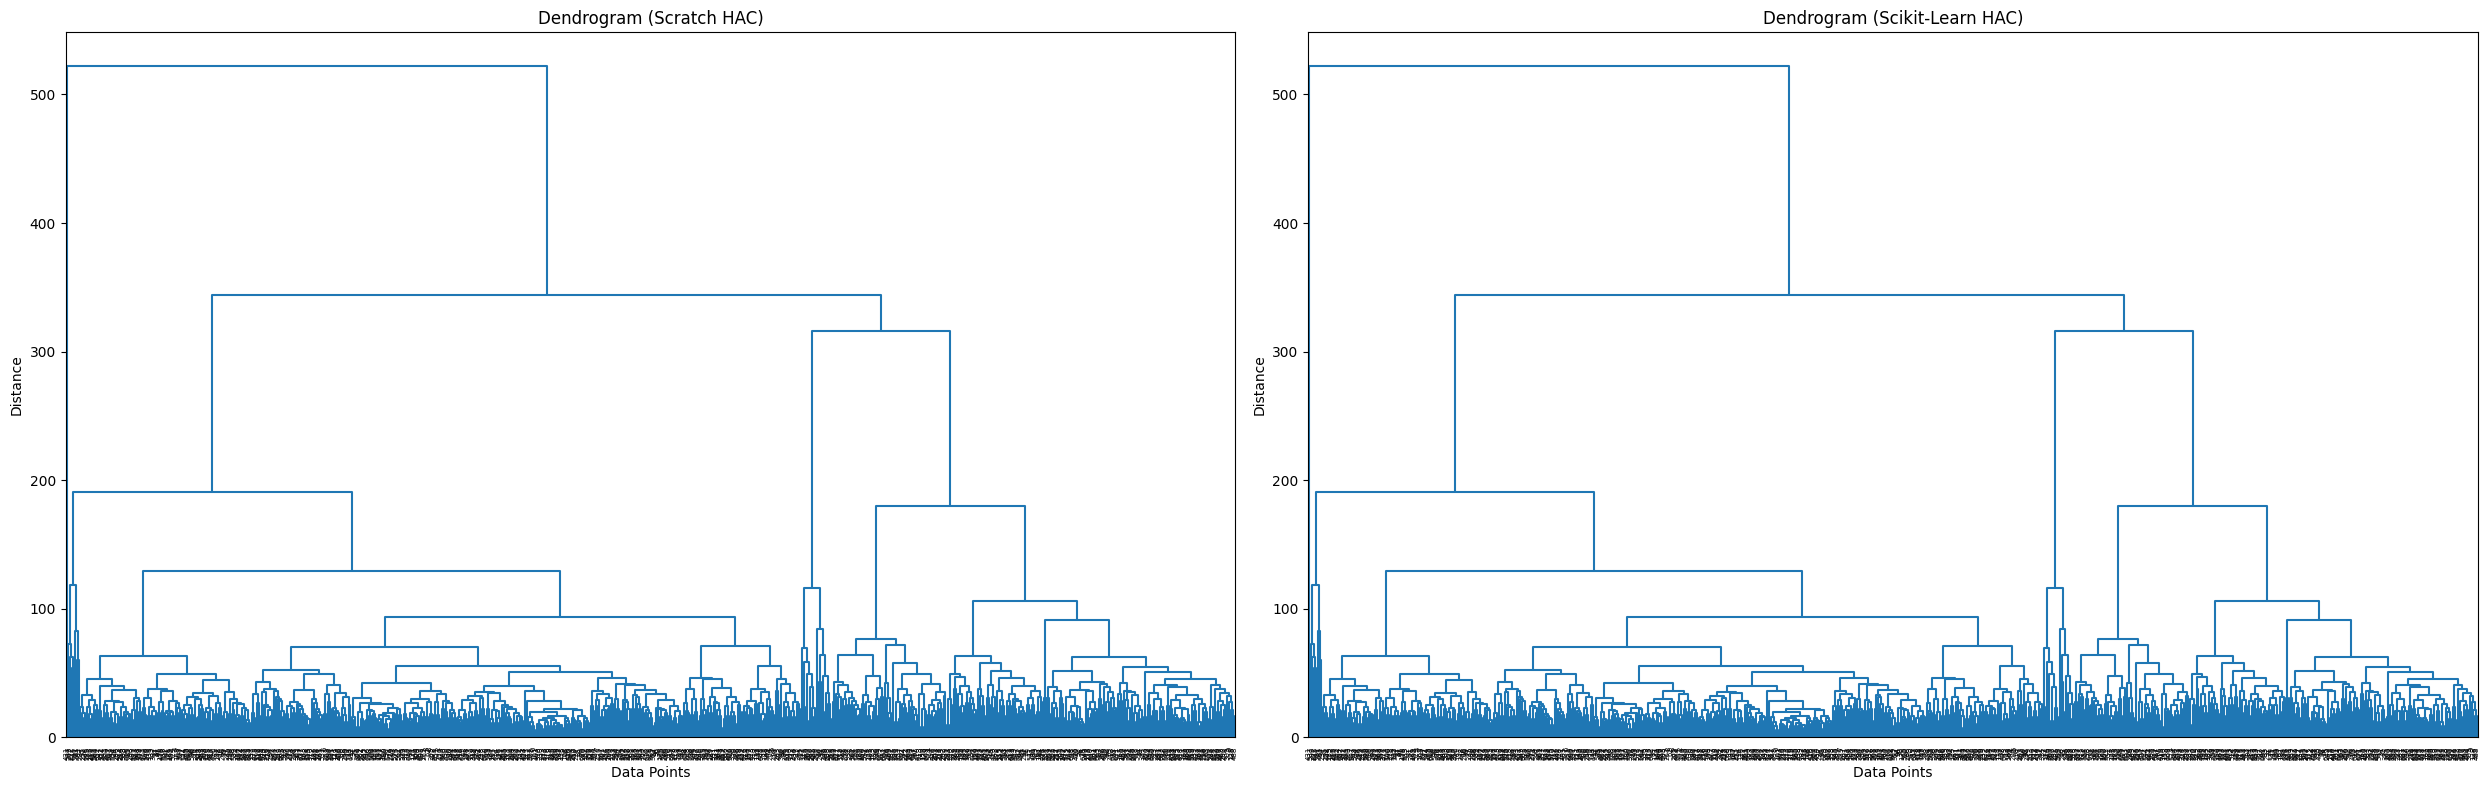

In [43]:
# Task 5: Plot Dendrograms for Comparison

# Calculate linkage matrices for dendrogram visualization
linkage_matrix_custom = linkage(X_train, method='average', metric='euclidean')
linkage_matrix_sklearn = linkage(X_train, method='average', metric='euclidean')

# Plot side-by-side dendrograms for custom and Scikit-Learn HAC implementations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8))

# Dendrogram for custom HAC
dendrogram(linkage_matrix_custom, ax=ax1, color_threshold=0.2)
ax1.set_title('Dendrogram (Scratch HAC)')
ax1.set_xlabel('Data Points')
ax1.set_ylabel('Distance')

# Dendrogram for Scikit-Learn HAC
dendrogram(linkage_matrix_sklearn, ax=ax2, color_threshold=0.2)
ax2.set_title('Dendrogram (Scikit-Learn HAC)')
ax2.set_xlabel('Data Points')
ax2.set_ylabel('Distance')

plt.tight_layout()
plt.show()

# Task - 6

In [40]:
# Task 6: Relabeling Clusters for Consistency

# Calculate cluster centroids
def calculate_centroids(data, labels, num_clusters):
    centroids = []
    for cluster_id in range(num_clusters):
        cluster_points = data[labels == cluster_id]
        centroids.append(np.mean(cluster_points, axis=0))
    return centroids

# Relabel clusters based on centroid order for consistency
def relabel_clusters(data, labels, num_clusters):
    centroids = calculate_centroids(data, labels, num_clusters)
    sorted_indices = np.argsort([np.sum(centroid) for centroid in centroids])
    label_map = {original: new for new, original in enumerate(sorted_indices)}
    return np.vectorize(label_map.get)(labels)

# Relabel clusters for custom and Scikit-Learn implementations
custom_hac_labels_relabel = relabel_clusters(X_train.values, custom_hac_labels, 4)
sklearn_labels_relabel = relabel_clusters(X_train.values, sklearn_labels, 4)

# Task - 7

In [41]:
# Task 7: Evaluate Cluster Label Consistency

# Calculate the percentage of matching labels between both methods
matching_labels_count = np.sum(custom_hac_labels_relabel == sklearn_labels_relabel)
total_data_points = len(custom_hac_labels_relabel)
matching_percentage = (matching_labels_count / total_data_points) * 100

print(f"Percentage of matching labels between methods: {matching_percentage:.2f}%")

Percentage of matching labels between methods: 100.00%


# Task - 8

In [42]:
# Task 8: Report Cluster Consistency with Original Class Labels

# Function to analyze cluster consistency with actual class labels
def report_cluster_consistency(cluster_labels, actual_labels):
    num_clusters = len(np.unique(cluster_labels))
    unique_classes = np.unique(actual_labels)

    for cluster_id in range(num_clusters):
        cluster_samples = actual_labels[cluster_labels == cluster_id]
        cluster_size = len(cluster_samples)

        print(f"\nCluster {cluster_id} (Size: {cluster_size}):")
        for class_label in unique_classes:
            class_count = np.sum(cluster_samples == class_label)
            class_fraction = class_count / cluster_size if cluster_size > 0 else 0
            print(f"  Class {class_label}: {class_fraction:.2f}")

# Report consistency for both custom and Scikit-Learn HAC labels
print("\nCustom HAC Cluster Consistency:")
report_cluster_consistency(custom_hac_labels_relabel, y_train.values)

print("\nScikit-Learn HAC Cluster Consistency:")
report_cluster_consistency(sklearn_labels_relabel, y_train.values)


Custom HAC Cluster Consistency:

Cluster 0 (Size: 424):
  Class 204: 0.00
  Class bus: 0.30
  Class opel: 0.16
  Class saab: 0.17
  Class van: 0.38

Cluster 1 (Size: 1):
  Class 204: 1.00
  Class bus: 0.00
  Class opel: 0.00
  Class saab: 0.00
  Class van: 0.00

Cluster 2 (Size: 233):
  Class 204: 0.00
  Class bus: 0.13
  Class opel: 0.42
  Class saab: 0.45
  Class van: 0.00

Cluster 3 (Size: 18):
  Class 204: 0.00
  Class bus: 1.00
  Class opel: 0.00
  Class saab: 0.00
  Class van: 0.00

Scikit-Learn HAC Cluster Consistency:

Cluster 0 (Size: 424):
  Class 204: 0.00
  Class bus: 0.30
  Class opel: 0.16
  Class saab: 0.17
  Class van: 0.38

Cluster 1 (Size: 1):
  Class 204: 1.00
  Class bus: 0.00
  Class opel: 0.00
  Class saab: 0.00
  Class van: 0.00

Cluster 2 (Size: 233):
  Class 204: 0.00
  Class bus: 0.13
  Class opel: 0.42
  Class saab: 0.45
  Class van: 0.00

Cluster 3 (Size: 18):
  Class 204: 0.00
  Class bus: 1.00
  Class opel: 0.00
  Class saab: 0.00
  Class van: 0.00
